# Introduction

Top athletes are put to the ultimate test bi-yearly - competing at the Olympics amongst their highest competitors. Notoriously, new-talent athletes are introduced at this international event, and winning a medal solidifies their credibility as a top performer (Horne, 2016). 

According to Apollaro et al, younger athletes tend to show more success in sports such as taekwondo,due to their physical strength and weight (Apollaro, 2022). However, studies such as by Ford and Williams have demonstrated through experimentation that higher skill level that comes with age contributes to more awards in sports such as soccer (Ford, 2013) or skiing. 

This leads us to our question: <u>Across the summer and winter Olympics, what is the mean age of first-time Olympic medal winners?</u> (<mark>TODO: Restate question?</mark>)

To conduct this analysis, we will be filtering our dataset of winter and summer Olympic medallists to ensure we only count the age of their debut win towards the mean of the sample population using `age`, `season`, and `medals`. Additionally, we will be using standard deviation as our scale parameter. We will be generalizing age across sports and genders, and assuming that the age of peak performance is similar in all of them. This is because we aim to find the mean age of the average Olympian, regardless of the sport they’re associated with. We hypothesize that due to extraneous demands and reliance on the environment in winter sports, the skill and mental and physical strengths of older athletes will prove more advantageous in the winter compared to the summer. <u>In other words, we believe that there will be a difference between the mean age of first-time medal winners across the Winter and Summer Olympics</u>. 

# Methods

## Load Libraries

In [1]:
## code to get rid of warnings
defaultW <- getOption("warn") 
options(warn = -1) 
##

suppressPackageStartupMessages(library(tidyverse))
library(repr)
library(digest)
library(infer)
library(broom)
suppressPackageStartupMessages(library(gridExtra))
library(cowplot)
source("R/plotting.R")
source("R/display.R")

## Data Intake and Pre-Processing

First, we will read in the dataset. The code here assumes you've downloaded the dataset and placed them into a data folder. If you would like to run our code and follow along, please clone our GitHub repository [here](https://github.com/KevinSaigon/stat-201-project)

In [2]:
data <- read.csv(file = "data/athlete_events.csv")

We will then do some pre-processing to get rid of any athlete whose age is is not known as well as filter out ones who did not win gold medals. 

The next step was then to only count first-time wins for multiple-time medal winners (i.e Michael Phelps). The code below essentially only keep the first occurrence of an athlete's ID, and since we sorted the dataframe by Year, this equates to the athlete's first time winning the gold medal.

In [3]:
processed_df <- data[order(data$Year),]  %>% 
    filter(!is.na(Age)) %>%    # get rid of NA/Age
    filter(!is.na(Medal)) %>%  # get rid of anyone who didn't win a medal either
    subset(select = c(ID, Name, Age, Season, Medal))

first_time_only <- processed_df[match(unique(processed_df$ID), processed_df$ID),] # only first time winners now, if they won a second time, it was excluded
    
head(first_time_only)

,ID,Name,Age,Season,Medal
,<int>,<chr>,<int>,<chr>,<chr>
1,12068,Arthur Charles Blake,24,Summer,Silver
2,12563,Conrad Helmut Fritz Bcker,25,Summer,Gold
4,12929,John Mary Pius Boland,25,Summer,Gold
6,16616,"Thomas Edmund ""Tom"" Burke",21,Summer,Gold
8,17492,Eugne Henri Callot,20,Summer,Silver
9,18785,Demetrius Emmanuel Casdagli,23,Summer,Silver


Next, we will split the dataset by their Season, the winter Olympics vs the summer Olympics

In [4]:
winter_df <- first_time_only %>% 
    filter(Season == "Winter")

summer_df <- first_time_only %>% 
    filter(Season == "Summer")

head(winter_df)
cat(c("Number of Examples:", nrow(winter_df)))
head(summer_df)
cat(c("Number of Examples:", nrow(summer_df)))

,ID,Name,Age,Season,Medal
,<int>,<chr>,<int>,<chr>,<chr>
1,391,Clarence John Abel,23,Winter,Silver
2,1341,Johan Petter hln (Andersson-),44,Winter,Silver
3,3872,William Harding Anderson,22,Winter,Bronze
4,4060,Georges Jules Andr,47,Winter,Bronze
5,5232,Thomas Alfred Arnold,22,Winter,Silver
6,5932,Alfred Aufdenblatten,26,Winter,Gold


Number of Examples: 3658

,ID,Name,Age,Season,Medal
,<int>,<chr>,<int>,<chr>,<chr>
1,12068,Arthur Charles Blake,24,Summer,Silver
2,12563,Conrad Helmut Fritz Bcker,25,Summer,Gold
3,12929,John Mary Pius Boland,25,Summer,Gold
4,16616,"Thomas Edmund ""Tom"" Burke",21,Summer,Gold
5,17492,Eugne Henri Callot,20,Summer,Silver
6,18785,Demetrius Emmanuel Casdagli,23,Summer,Silver


Number of Examples: 23949

## Calculations 

If we are assuming that this dataset is 100% accurate and thus represent that entire population of all Olympic participants, then we could consider the dataset a population, and thus uncertainty would be 0%. However, in reality, if we were trying to gather this dataset ourselves, it is extremely unlikely as well as unfeasible to collect so many data points. Realistically, we would take a sample of this population, so we will will take an initial sample of 1000

In [5]:
set.seed(42069)

winter_sample <- winter_df %>% 
    rep_sample_n(size = 1000, reps = 1) %>% 
    subset(select = -(replicate))

summer_sample <- summer_df %>% 
    rep_sample_n(size = 1000, reps = 1) %>% 
    subset(select = -(replicate))

head(winter_sample)

ID,Name,Age,Season,Medal
<int>,<chr>,<int>,<chr>,<chr>
85481,Michael Neumayer,31,Winter,Silver
25759,Vitaly Semyonovich Davydov,24,Winter,Gold
3951,Lina Marie Andersson,24,Winter,Gold
44916,Veikko Johannes Hakulinen,27,Winter,Gold
42073,Amlie Goulet-Nadon,19,Winter,Bronze
49094,Lukas Hofer,24,Winter,Bronze


From this, we can calculate our estimates of the mean for each season

In [6]:
winter_mean_estimate <- mean(winter_sample$Age)
summer_mean_estimate <- mean(summer_sample$Age)

cat("Winter Mean Estimate:", winter_mean_estimate, "\nSummer Mean Estimate:", summer_mean_estimate)

Winter Mean Estimate: 25.165 
Summer Mean Estimate: 25.078

## Sampling

Then, we'll perform bootstrapping or resampling with replacement to calculate uncertainty later on

In [7]:
set.seed(42069)

winter_bootstrap <- winter_sample %>% 
    rep_sample_n(size = 1000, reps = 200, replace = TRUE)

summer_bootstrap <- summer_sample %>% 
    rep_sample_n(size = 1000, reps = 200, replace = TRUE)


head(summer_bootstrap)
cat("Table 1: Preview of Summer Bootstrap sample")

replicate,ID,Name,Age,Season,Medal
<int>,<int>,<chr>,<int>,<chr>,<chr>
1,59251,Ilias Khatzipavlis,23,Summer,Silver
1,26210,"Regina Constance ""Reggie"" de Jong",16,Summer,Bronze
1,63441,Andriy Kovalenko,21,Summer,Bronze
1,33767,Otto Fahr,19,Summer,Silver
1,69088,Melanie Leupolz,22,Summer,Gold
1,100141,Michael Reusch,22,Summer,Silver


Table 1: Preview of Summer Bootstrap sample

Now, we will calculate the sample mean for each sample.

Table 2: Sample of Mean age for Winter and Summer Olympic

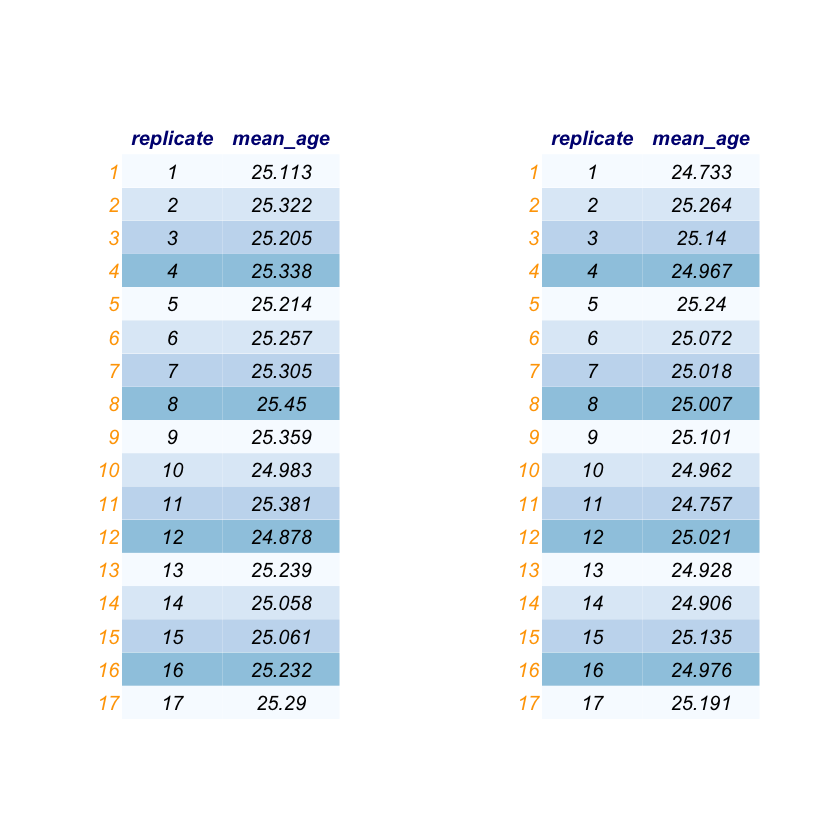

In [8]:
winter_resampled_means <- winter_bootstrap %>% 
    group_by(replicate) %>% 
    summarize(mean_age = mean(Age))

summer_resampled_means <- summer_bootstrap %>% 
    group_by(replicate) %>% 
    summarize(mean_age = mean(Age))

df_list = list(head(winter_resampled_means, 17), head(summer_resampled_means, 17))
table_render(df_list)
cat("Table 2: Sample of Mean age for Winter and Summer Olympic")

## Visualizations

Let's first remind ourselves of our calculated estimates

In [9]:
name <- c("Winter Mean Estimate", "Summer Mean Estimate")
values <- c(winter_mean_estimate, summer_mean_estimate)

tab <- data.frame(name, values)
tab
cat("Table 3: Summarizing the mean for each")

name,values
<chr>,<dbl>
Winter Mean Estimate,25.165
Summer Mean Estimate,25.078


Table 3: Summarizing the mean for each

In [10]:
winter_hist <- plot_histogram(winter_resampled_means, "mean_age", 0.1, TRUE) + 
    geom_vline(xintercept = winter_mean_estimate, color = "blue") + 
    labs(x="Mean Age", title="Bootstrap distribution of Mean Age for Winter Olympics", caption="Figure 2.1") +
    theme(plot.caption = element_text(size = 17, hjust=0.5))


In [11]:
summer_hist <- plot_histogram(summer_resampled_means, "mean_age", 0.1, TRUE) +
    geom_vline(xintercept = summer_mean_estimate, color = "blue") +
    labs(x="Mean Age", title="Bootstrap distribution of Mean Age for Summer Olympics", caption="Figure 2.2") +
    theme(plot.caption = element_text(size = 17, hjust=0.5))

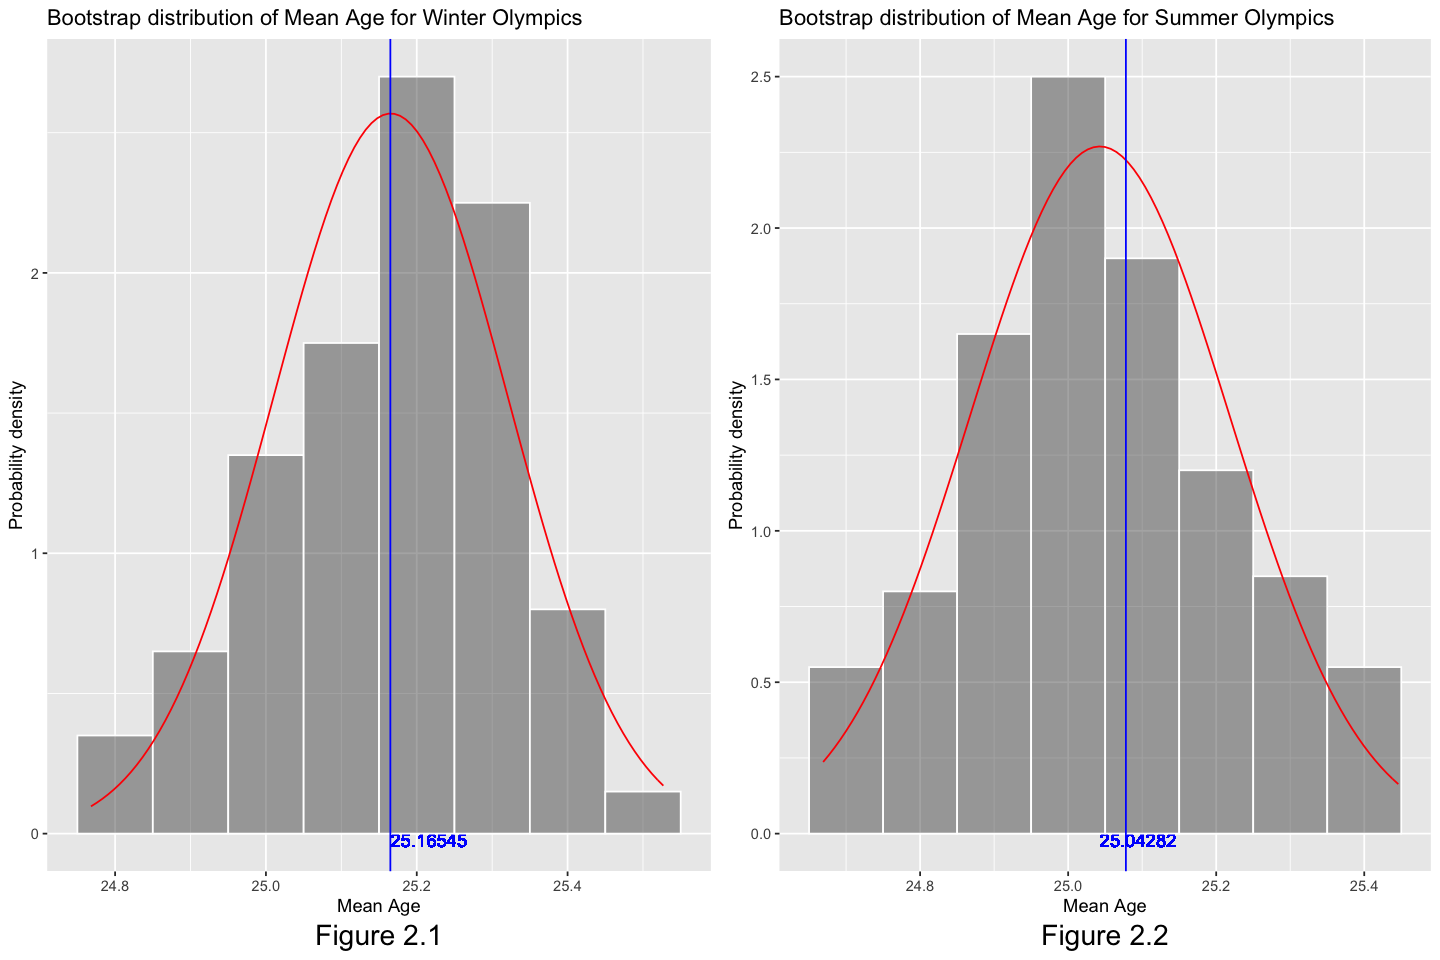

In [12]:
options(repr.plot.width=12, repr.plot.height=8)
plot_grid(winter_hist, summer_hist)

# Results

This report is trustworthy because in pre-processing, we exclusively included examples that fit the criteria of our research question, i.e athletes that have won medals and whose ages are known. Our sample was conducted randomly, meaning it is representative of the Olympian population. Finally, the report is trustworthy because it concedes that there is uncertainty in our calculated mean ages. We will use our plan and preliminary results to find accurate estimates of the true ages, not the exact ages.

Our sampling distribution plots and point estimates are not sufficient to take to stakeholders because they do not illustrate the uncertainty in our calculations. We plan to calculate 95% confidence intervals of the mean age of first-time Olympic medalists in the Summer and Winter Olympics to take the sampling variation into account, and to conduct a $t$-test to see if the true average ages between the games are different.


## Hypothesis Testing

### $t-$Test (Theory-based)

Let's first establish our hypothesis test once again - we believe that <u>the mean age of first-time medal winners in the Winter Olympics is higher than that of the Summer Olympics</u>, that is:

<mark>TODO: is this supposed to be two sided??</mark>
$$ H_0: \mu_{\text{Summer}} =  \mu_{\text{Winter}} ~~~ \text{ vs } ~~~ H_A: \mu_{\text{Summer}} \neq \mu_{\text{Winter}} $$ 

We use a Welch's two sample t-test based on the Student t-distribution to reflect the fact that we our comparing two means we assume to be equal by our null hypothesis. Furthermore, our code that computes our t-test also creates a confidence interval reflecting the uncertainty in the differences of the means. 

A $t-$distribution is appropriate to calculate this interval because, again, we are comparing two means that we assume are equal under our null hypothesis, and we don't know the standard deviations of these populations. Though both our sample size are much greater than 30 (or 50 for that matter) - which means that the difference between the $t-$distribution and Normal distribution is close to none; we are still using the $t-$distribution to make the code more generalizable to other samples that may have a smaller $n$.

This approach is consistent with our use of bootstrapped samples to compare the populations means in our preliminary analysis:

In [13]:
t_test <- t.test(pull(summer_sample, Age),
                 pull(winter_sample, Age),
                 alternative = "two.sided",
                 conf.level = 0.95)

cat(c("P-value:", t_test$p.value))

P-value: 0.712421504940786

So our theory-based two-sample hypothesis test based on the $t-$distribution gave us a $P-$value of 0.712

### Simulation-based Hypothesis Testing

Serving as a sanity-check, as well as additional evidence for our original theory-based approach to hypothesis testing, we'll also be performing a simulation-based hypothesis test using the `infer` package. 

First, we will combine both `summer_sample` and `winter_sample` into one `combined_sample`.

In [14]:
combined_sample <- bind_rows(summer_sample, winter_sample)

We will utilize the `infer` workflow to calculate the bootstrap sample of difference in mean age between Summer and Winter Olympic under the Null Hypothesis (Distribution).

In [15]:
set.seed(42069)

null_distribution <- combined_sample %>%
    specify(Age ~ Season) %>%
    hypothesise("independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("Summer", "Winter"))

Use the same workflow to calculate the observed difference in mean between Summer and Winter Olympic.

In [16]:
obs_diff_mean <- combined_sample %>%
    specify(Age ~ Season) %>%
    calculate(stat = "diff in means", order = c("Summer", "Winter"))

From here, we can get the P-value and visualize it on top of the Null Distribution.

P-value: 0.702



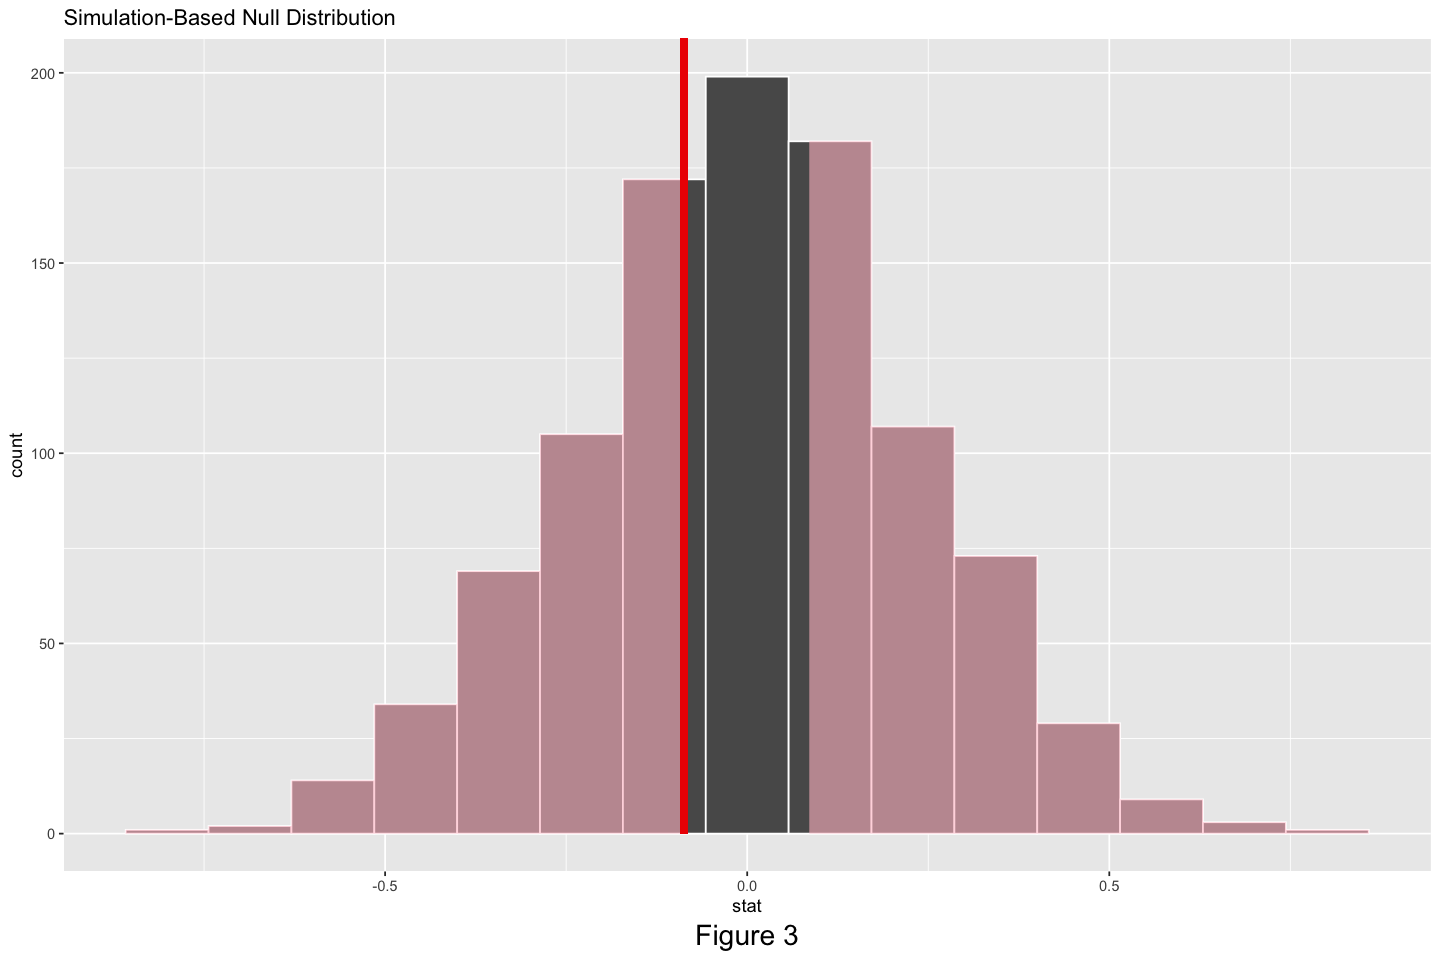

In [17]:
p_value = get_p_value(null_distribution,
                       obs_stat = obs_diff_mean,
                       direction = "both")

cat(c("P-value:", p_value$p_value))
cat("\n\n")
visualize(null_distribution) +
    shade_p_value(obs_stat = obs_diff_mean, "both") +
    labs(caption = "Figure 3") +
    theme(plot.caption = element_text(size = 17, hjust = 0.5))  # the red vertical line

We achieve a $P$-value of 0.702 from our simulation-based two-sample hypothesis test

<mark>TODO:</mark> Do you think one of bootstrapping or asymptotics is more appropriate than the other? Why or why not? Explain why you think both methods gave you similar/different results, and whether you think one is more trustworthy than the other.

## Confidence Interval

Next, we will compute the confidence interval to further the rigidity of our tests as well as communicate uncertainty in our answer.

# A tibble: 1 × 2
  lower_ci upper_ci
     <dbl>    <dbl>
1   -0.552    0.378



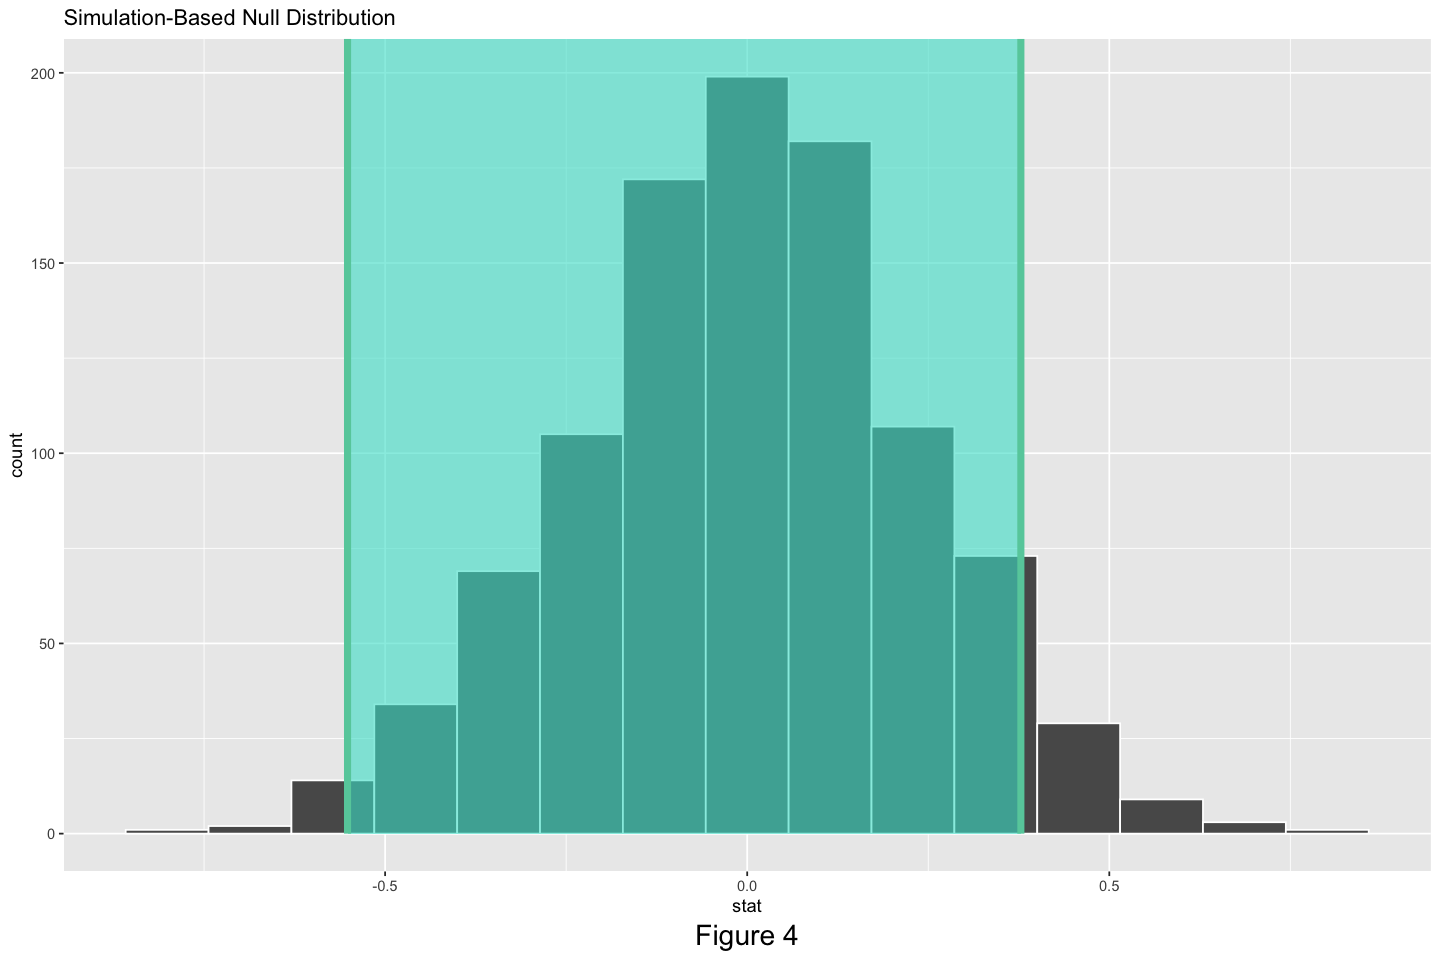

In [18]:
percentile_ci <- null_distribution %>%
    get_confidence_interval(level = 0.95,
                            point_estimate = obs_diff_mean,
                            type = "se")
    

print(percentile_ci)
cat("\n")
visualize(null_distribution) +
    shade_ci(endpoints = percentile_ci) +
    labs(caption = "Figure 4") +
    theme(plot.caption = element_text(size = 17, hjust = 0.5)) # the blue box

We got a 95% confidence interval of $[-0.552, 0.378]$.

**Interpretation: The true different in mean age of athletes between Summer Olympic and Winter Olympic will be in between the interval $[-0.552, 0.378]$ for roughly 95% of the time.**

We notice that the the confidence interval is very small (eg. -0.552 and 0.378 are not even close 1 year different in mean age), which also means that the difference in mean age is pretty much neglible.

# <mark> TODO: Discussion</mark>

**Just have to copy the rest over from Docs**

Our results could be useful for Olympic recruiters, coaches, and athletes. If we find a large distinction in average age of first time medalists between the games, recruiters may put less emphasis on youth and more on skill level for, say, the Winter games. Additionally, athletes may feel less discouraged about their early career performance, and prioritize improvement with age. 

In the future, questions about the age differences between multi-winning medalists can be considered. If our research indicates that skill level is more important to Winter Olympians, maybe the difference in average ages of multi-winning medalists is even more distinct.

# References

Apollaro, G., Rodríguez, Y. Q., Herrera-Valenzuela, T., Hernández-Mendo, A., & Falcó, C. (2022, January 27). Relative and chronological age in successful athletes at the World Taekwondo Championships (1997–2019): A focus on the behaviour of multiple medallists. MDPI. Retrieved March 1, 2022, from https://doi.org/10.3390/ijerph19031425 

Ford, P. R., & Williams, M. A. (2013, January 23). No relative age effect in the birth dates of award-winning athletes in male professional team sports. Taylor & Francis. Retrieved March 1, 2022, from https://www.tandfonline.com/doi/abs/10.1080/02701367.2011.10599790 

John Horne, G. W. (2016, May 26). Understanding the Olympics: Second edition. Taylor & Francis. Retrieved March 1, 2022, from https://www.taylorfrancis.com/books/mono/10.4324/9781315712529/understanding-olympics-john-horne-garry-whannel 